# Going deeper
>  Convolutional neural networks gain a lot of power when they are constructed with multiple layers (deep networks). In this chapter, you will learn how to stack multiple convolutional layers into a deep network. You will also learn how to keep track of the number of parameters, as the network grows, and how to control this number.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Image Processing with Keras in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

## Going deeper

### Creating a deep learning network

<div class=""><p>A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data. </p>
<p>Here, you will create a network that has two convolutional layers.</p></div>

In [3]:
img_rows, img_cols = 28, 28

Instructions
<ul>
<li>The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a <code>'relu'</code> activation function. It can use the variables <code>img_rows</code> and <code>img_cols</code> to define its <code>input_shape</code>.</li>
<li>The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a <code>'relu'</code> activation function.</li>
</ul>

In [4]:
model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu',
input_shape=(img_rows, img_cols, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten (Flatten)            (None, 3380)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


### Train a deep CNN to classify clothing images

<div class=""><p>Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data. </p>
<p>The <code>model</code> you built in the previous exercise is available in your workspace.</p></div>

In [5]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/19-image-processing-with-keras-in-python/datasets/fashion.h5
import h5py
h5f = h5py.File('fashion.h5','r')
train_data = h5f['train_data'][:]
train_labels = h5f['train_labels'][:]
test_data = h5f['test_data'][:]
test_labels = h5f['test_labels'][:]
h5f.close()

Instructions
<ul>
<li>Compile the model to use the categorical cross-entropy loss function and the Adam optimizer.</li>
<li>Train the network with <code>train_data</code> for 3 epochs with batches of 10 images each.</li>
<li>Use randomly selected 20% of the training data as validation data during training.</li>
<li>Evaluate the model with <code>test_data</code>, use a batch size of 10.</li>
</ul>

In [6]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 153ms/step - loss: 1.0386 - accuracy: 0.3967 - val_loss: 0.7047 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 19ms/step - loss: 0.7478 - accuracy: 0.7900 - val_loss: 0.5475 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 18ms/step - loss: 0.4839 - accuracy: 0.9000


[0.4838889241218567, 0.8999999761581421]

### What is special about a deep network?

<div class=""><p>Networks with more convolution layers are called "deep" networks, and they may have more power to fit complex data, because of their ability to create hierarchical representations of the data that they fit.</p>
<p>What is a major difference between a deep CNN and a CNN with only one convolutional layer?</p></div>

<pre>
Possible Answers
A deep network is inspired by the human visual system.
<b>A deep network requires more data and more computation to fit.</b>
A deep network has more dense layers.
A deep network has larger convolutions.
</pre>

## How many parameters?

### How many parameters in a CNN?

<p>We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?</p>

In [ ]:
(10 * 9 + 10) + ((28 * 28 * 10) * 2 + 2)

15782

<pre>
Possible Answers
100
1668
<b>15,782</b>
15,682
</pre>

### How many parameters in a deep CNN?

<div class=""><p>In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network. </p>
<p>We have already provided code that builds a deep CNN for you.</p></div>

Instructions
<p>Summarize the network, providing a count of the number of parameters.</p>

In [7]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


## Pooling operations

### Write your own pooling operation

<div class=""><p>As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.</p>
<p>A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/19-image-processing-with-keras-in-python/datasets/im.npz
im = np.load('im.npz')
im = im.f.arr_0

In [ ]:
im.shape

(159, 240)

Instructions
<ul>
<li>Index into the input array (<code>im</code>) and select the right window.</li>
<li>Find the maximum in this window.</li>
<li>Allocate this into the right entry in the output array (<code>result</code>).</li>
</ul>

In [ ]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

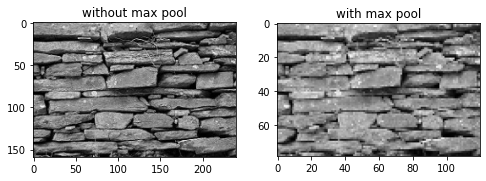

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.set_title('without max pool')
ax2.imshow(result, cmap=plt.cm.gray)
ax2.set_title('with max pool')
plt.show()

**The resulting image is smaller, but retains the salient features in every location**

### Keras pooling layers

<div class=""><p>Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before: </p>
<p><strong>Convolution =&gt; Convolution =&gt; Flatten =&gt; Dense</strong></p>
<p>However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:</p>
<p><strong>Convolution =&gt; Max pooling =&gt; Convolution =&gt; Flatten =&gt; Dense</strong></p>
<p>A Sequential <code>model</code> along with <code>Dense</code>, <code>Conv2D</code>, <code>Flatten</code>, and <code>MaxPool2D</code> objects are available in your workspace.</p></div>

In [8]:
from tensorflow.keras.layers import MaxPool2D
img_rows, img_cols = 28, 28
model = Sequential()

Instructions
<ul>
<li>Add an input convolutional layer (15 units, kernel size of 2, <code>relu</code> activation).</li>
<li>Add a maximum pooling operation (pooling over windows of size 2x2). </li>
<li>Add another convolution layer (5 units, kernel size of 2, <code>relu</code> activation). </li>
<li>Flatten the output of the second convolution and add a <code>Dense</code> layer for output (3 categories, <code>softmax</code> activation).</li>
</ul>

In [9]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_2 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


**This model is even deeper, but has fewer parameters.**

### Train a deep CNN with pooling to classify images

<div class=""><p>Training a CNN with pooling layers is very similar to training of the deep networks that y have seen before. Once the network is constructed (as you did in the previous exercise), the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure. </p>
<p>The following <code>model</code> from the previous exercise is available in your workspace: </p>
<p><strong>Convolution =&gt; Max pooling =&gt; Convolution =&gt; Flatten =&gt; Dense</strong></p></div>

Instructions
<ul>
<li>Compile this model to use the categorical cross-entropy loss function and the Adam optimizer. </li>
<li>Train the model for 3 epochs with batches of size 10.</li>
<li>Use 20% of the data as validation data.</li>
<li>Evaluate the model on <code>test_data</code> with <code>test_labels</code> (also batches of size 10).</li>
</ul>

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=0.2)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 65ms/step - loss: 1.0604 - accuracy: 0.3700 - val_loss: 0.9030 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 63ms/step - loss: 0.9540 - accuracy: 0.5533 - val_loss: 0.8090 - val_accuracy: 0.9000
Epoch 3/3
1/1 [==============================] - 0s 16ms/step - loss: 0.9427 - accuracy: 0.5000


[0.9426721334457397, 0.5]